Forest fires in Brazil Exploratory Data Analysis


Source: https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil#amazon.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "c:/git/HomeProject/csvs/amazon.csv"

# Create DataFrame object
df = pd.read_csv(file, encoding="latin1")

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [36]:
df.groupby('date').count()
# It seems like the 'date' columns is not so useful.. 
# We should combine year and month columns to create a monthly sum of number of fires per state

,year,state,month,number
date,,,,
1998-01-01,324,324,324,324
1999-01-01,324,324,324,324
2000-01-01,324,324,324,324
2001-01-01,324,324,324,324
2002-01-01,324,324,324,324
2003-01-01,324,324,324,324
2004-01-01,324,324,324,324
2005-01-01,324,324,324,324
2006-01-01,324,324,324,324


In [5]:
df['Datetime'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))
# It won't work, because we have portuguese values in month column..

ValueError: Unable to parse string "Janeiro" at position 0

In [6]:
def convert_months(month):
    """
    1. Step: Translate month data from Portuguese to English.
    2. Step: Create integer object from input data.
    3. Step: return date object.
    """
    if str(month)[:3] == 'Jan':
        new_month = 1
    elif str(month)[:3] == 'Fev':
        new_month = 2
    elif str(month)[:3] == 'Mar':
        new_month = 3
    elif str(month)[:3] == 'Abr':
        new_month = 4
    elif str(month)[:3] == 'Mai':
        new_month = 5
    elif str(month)[:3] == 'Jun':
        new_month = 6
    elif str(month)[:3] == 'Jul':
        new_month = 7
    elif str(month)[:3] == 'Ago':
        new_month = 8
    elif str(month)[:3] == 'Set':
        new_month = 9
    elif str(month)[:3] == 'Out':
        new_month = 10
    elif str(month)[:3] == 'Nov':
        new_month = 11
    elif str(month)[:3] == 'Dez':
        new_month = 12
    else:
        return print("Not convertable month data!")
    return new_month

In [4]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [8]:
month_list_en = []
month_list_pt = list(df.month)
for mon in month_list_pt:
    month_list_en.append(convert_months(mon))
df['months'] = month_list_en

In [9]:
df.head()
# Now, we have a column with integer values representing months.

,year,state,month,number,date,months
0,1998,Acre,Janeiro,0.0,1998-01-01,1
1,1999,Acre,Janeiro,0.0,1999-01-01,1
2,2000,Acre,Janeiro,0.0,2000-01-01,1
3,2001,Acre,Janeiro,0.0,2001-01-01,1
4,2002,Acre,Janeiro,0.0,2002-01-01,1


In [10]:
df.months.describe()

count    6454.000000
mean        6.476139
std         3.441522
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: months, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 6 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
months    6454 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 302.7+ KB


In [12]:
df['date'] = pd.to_datetime(df.year.astype(str) + '-' + df.months.astype(str))

In [13]:
df[df.months != 1].head()

,year,state,month,number,date,months
20,1998,Acre,Fevereiro,0.0,1998-02-01,2
21,1999,Acre,Fevereiro,0.0,1999-02-01,2
22,2000,Acre,Fevereiro,0.0,2000-02-01,2
23,2001,Acre,Fevereiro,0.0,2001-02-01,2
24,2002,Acre,Fevereiro,1.0,2002-02-01,2


Let's group by on the new date column

In [14]:
df.groupby('date').count()

,year,state,month,number,months
date,,,,,
1998-01-01,27,27,27,27,27
1998-02-01,27,27,27,27,27
1998-03-01,27,27,27,27,27
1998-04-01,27,27,27,27,27
1998-05-01,27,27,27,27,27
...,...,...,...,...,...
2017-07-01,27,27,27,27,27
2017-08-01,27,27,27,27,27
2017-09-01,27,27,27,27,27


In [15]:
df.set_index('date', inplace=True)

In [16]:
df.head()

,year,state,month,number,months
date,,,,,
1998-01-01,1998,Acre,Janeiro,0.0,1
1999-01-01,1999,Acre,Janeiro,0.0,1
2000-01-01,2000,Acre,Janeiro,0.0,1
2001-01-01,2001,Acre,Janeiro,0.0,1
2002-01-01,2002,Acre,Janeiro,0.0,1


In [17]:
df2 = df.loc[:,['state','number']]

In [28]:
df2.head()

,state,number
date,,
1998-01-01,Acre,0.0
1999-01-01,Acre,0.0
2000-01-01,Acre,0.0
2001-01-01,Acre,0.0
2002-01-01,Acre,0.0


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 1998-01-01 to 2016-12-01
Data columns (total 2 columns):
state     6454 non-null object
number    6454 non-null float64
dtypes: float64(1), object(1)
memory usage: 151.3+ KB


Now we have a new dataframe which has a DateTimeIndex, a state columns and a number column. Let's see what we get if we make some aggregations on the data...

In [33]:
df2.number = df2.number.astype(int)

In [34]:
df_sum_per_date = df2['number'].resample('Y').sum()
df_sum_per_date

date
1998-12-31    19999
1999-12-31    26869
2000-12-31    27341
2001-12-31    29056
2002-12-31    37369
2003-12-31    42737
2004-12-31    38427
2005-12-31    34984
2006-12-31    33819
2007-12-31    33017
2008-12-31    29363
2009-12-31    39104
2010-12-31    37015
2011-12-31    34619
2012-12-31    40065
2013-12-31    35130
2014-12-31    39601
2015-12-31    41184
2016-12-31    42189
2017-12-31    36663
Freq: A-DEC, Name: number, dtype: int32

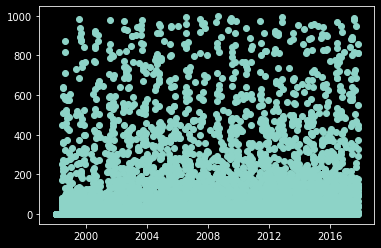

In [35]:
plt.scatter(df.index, df.number)

In [36]:
df_sum_per_date.describe()

count       20.00000
mean     34927.55000
std       5893.47546
min      19999.00000
25%      32103.50000
50%      35896.50000
75%      39228.25000
max      42737.00000
Name: number, dtype: float64

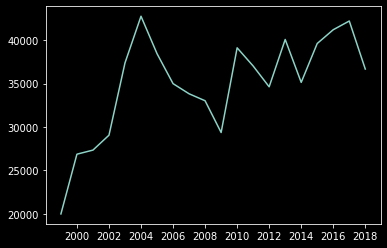

In [37]:
plt.plot(df_sum_per_date.index, df_sum_per_date)

There is an outstanding value of fire occurences in 2004 as we can see it on the plot above..

In [38]:
df_sum_per_state = df2.groupby('state')['number'].sum()
df_sum_per_state

state
Acre                18452
Alagoas              4644
Amapa               21831
Amazonas            30636
Bahia               44718
Ceara               30415
Distrito Federal     3561
Espirito Santo       6546
Goias               37677
Maranhao            25082
Mato Grosso         96178
Minas Gerais        37453
Paraiba             52432
Pará                24459
Pernambuco          24498
Piau                37777
Rio                 45160
Rondonia            20259
Roraima             24384
Santa Catarina      24359
Sao Paulo           51118
Sergipe              3237
Tocantins           33675
Name: number, dtype: int32

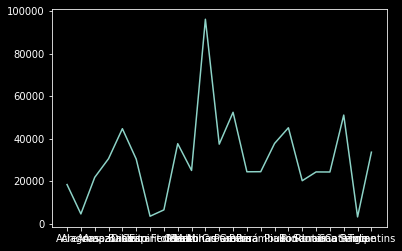

In [39]:
plt.plot(df_sum_per_state.index, df_sum_per_state)

OK, so we can see there's one state in Brazil, which has an outstanding summa of number of wood fires.. Let's explore the data we have about that special place!

In [40]:
# As we can see on the last plot that place has a huge value (over 80 000 incidents). But unfortunately we can't read the name of the place from the figure... 
df_sum_per_state > 80000

state
Acre                False
Alagoas             False
Amapa               False
Amazonas            False
Bahia               False
Ceara               False
Distrito Federal    False
Espirito Santo      False
Goias               False
Maranhao            False
Mato Grosso          True
Minas Gerais        False
Paraiba             False
Pará                False
Pernambuco          False
Piau                False
Rio                 False
Rondonia            False
Roraima             False
Santa Catarina      False
Sao Paulo           False
Sergipe             False
Tocantins           False
Name: number, dtype: bool

Nice, we got the name of the state: Mato Grosso

In [61]:
df_mato_grosso = df2.loc[df2.state == 'Mato Grosso']

In [62]:
df_mato_grosso.head()

,state,number
date,,
1998-01-01,Mato Grosso,0
1999-01-01,Mato Grosso,39
2000-01-01,Mato Grosso,44
2001-01-01,Mato Grosso,44
2002-01-01,Mato Grosso,172


In [58]:
df_mg_year_sum = df_mato_grosso.resample('Y').sum()

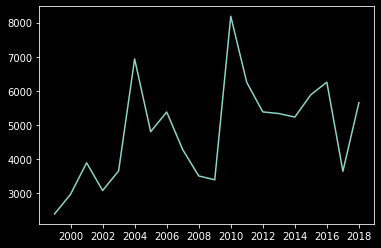

In [60]:
plt.plot(df_mg_year_sum.index, df_mg_year_sum.number)

As we can see on the plot that 2010 was a horrible year in Mato Grosso.. There were more than 8000 forest fires that year. But is it the highest number of occurences of fires in Brazil at the last 20 years?

In [65]:
df_others = df2.loc[df2.state != 'Mato Grosso']
df_others.describe()

,number
count,5976.000000
mean,100.798695
std,183.234507
min,0.000000
25%,3.000000
50%,22.000000
75%,101.000000
max,998.000000


In [66]:
df_others_year_sum = df_others.resample('Y').sum()
df_others_year_sum

,number
date,
1998-12-31,17600
1999-12-31,23894
2000-12-31,23445
2001-12-31,25972
2002-12-31,33709
2003-12-31,35800
2004-12-31,33621
2005-12-31,29602
2006-12-31,29535
